In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
dataset = pd.read_csv('taxi_data_subset.csv')

Conteving Date And Time(object) to DateTime (type)

In [70]:
dataset['Date and Time'] = pd.to_datetime(dataset['Date and Time'])

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype                    
---  ------         --------------  -----                    
 0   Unnamed: 0     10000 non-null  int64                    
 1   DriveNo        10000 non-null  int64                    
 2   Date and Time  10000 non-null  datetime64[ns, UTC+01:00]
 3   Longitude      10000 non-null  float64                  
 4   Latitude       10000 non-null  float64                  
dtypes: datetime64[ns, UTC+01:00](1), float64(2), int64(2)
memory usage: 390.8 KB


In [72]:
dataset['Hour'] = dataset['Date and Time'].dt.hour
dataset['DayOfWeek'] = dataset['Date and Time'].dt.dayofweek
print(dataset['Hour'])
print(dataset['DayOfWeek'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Hour, Length: 10000, dtype: int32
0       5
1       5
2       5
3       5
4       5
       ..
9995    5
9996    5
9997    5
9998    5
9999    5
Name: DayOfWeek, Length: 10000, dtype: int32


In [73]:
X = dataset[['Longitude', 'Latitude', 'Hour', 'DayOfWeek']]

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determining Optimal no of Clusters by Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

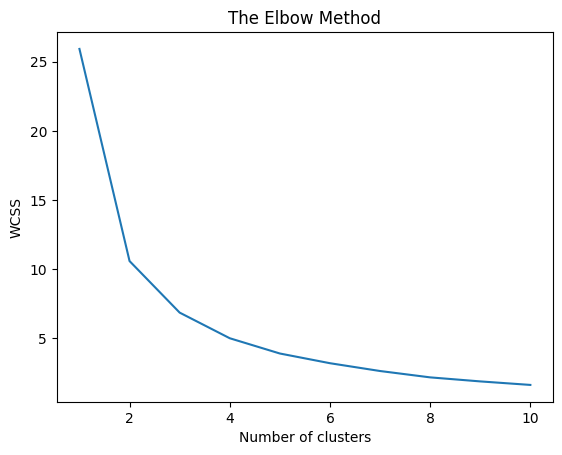

In [75]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Training The Model

In [76]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


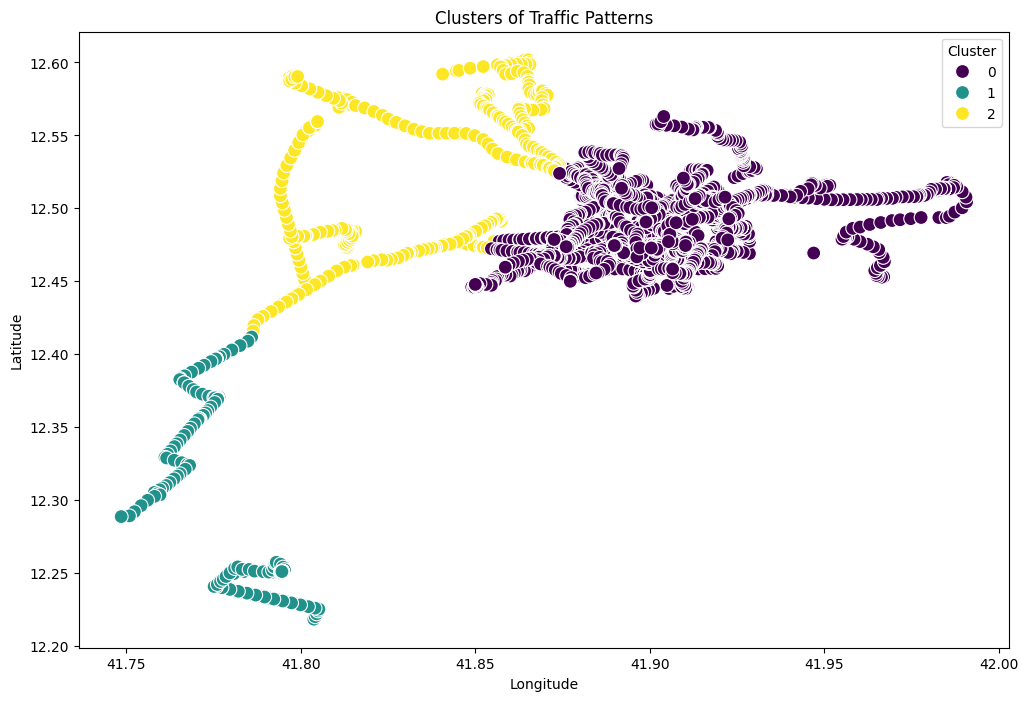

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Traffic Patterns')
plt.xlabel('Longitude')
plt.show()


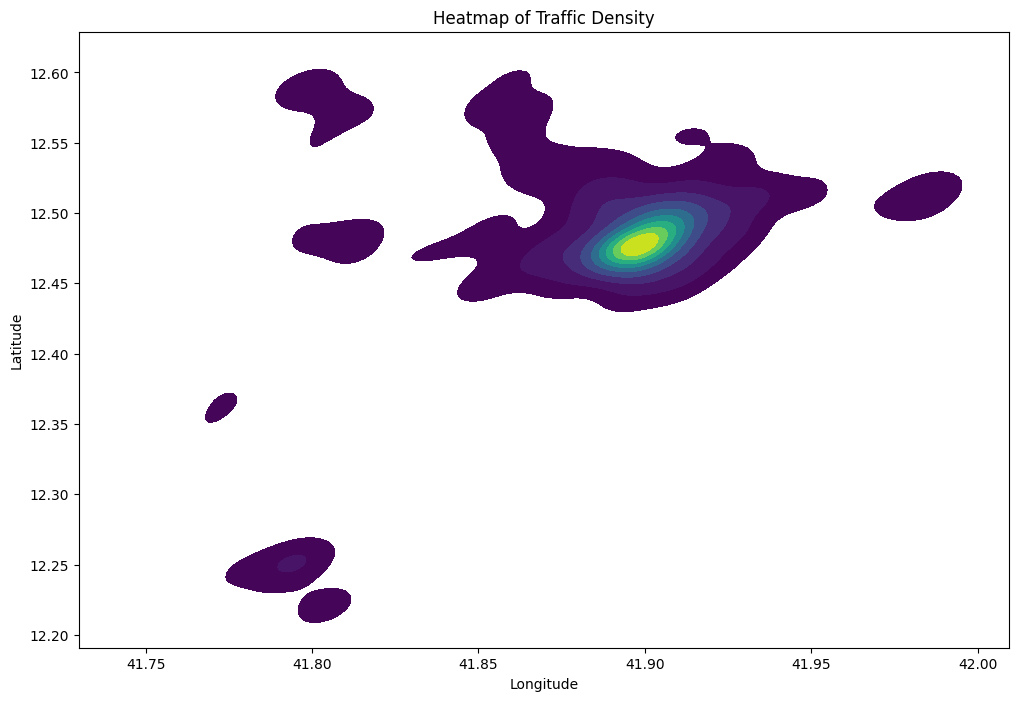

In [78]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=dataset, x='Longitude', y='Latitude', cmap='viridis', fill=True)
plt.title('Heatmap of Traffic Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()